In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
pattern_size = (9,7)
img_size = (1920, 1080)
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

In [6]:
imgdir='D:/44754/Documents/GitHub/Unorganized_work/ComputerVision/cw1/calibration/*.png'
result = sorted(glob.glob(imgdir))
print(result[0])
print(len(result))

D:/44754/Documents/GitHub/Unorganized_work/ComputerVision/cw1/calibration\calibration-01.png
33


33


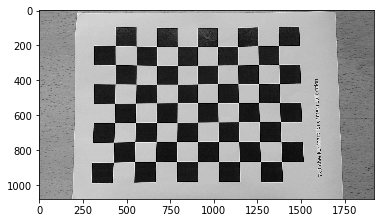

In [11]:
calibration_img_list = []
for fname in result:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    calibration_img_list.append(gray)
print(len(calibration_img_list))
plt.imshow(calibration_img_list[0])

In [23]:
# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# Prepare calibration pattern points (0,0,0), (1,0,0), 
# (2,0,0) ....,(6,5,0)
objpts = np.zeros((pattern_size[0]*pattern_size[1],3),np.float32)
objpts[:,:2] = np.mgrid[0:pattern_size[0],
                        0:pattern_size[1]].T.reshape(-1,2)

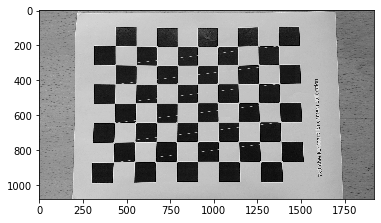

In [31]:
objptslist = []; imgptslist = []
corner_img_list = []
for id,gray in enumerate(calibration_img_list):
    retval,corners = cv2.findChessboardCorners(gray,pattern_size,None)
    if retval:
        refined_corners = cv2.cornerSubPix(gray,corners,pattern_size,
                                       (-1,-1),criteria)
        objptslist.append(objpts)
        imgptslist.append(refined_corners)
        
        tmpimg = gray.copy()
        tmpimg= cv2.drawChessboardCorners(tmpimg,pattern_size,
                                         refined_corners,retval)
        corner_img_list.append(tmpimg)
plt.imshow(corner_img_list[0])

In [32]:
retval,camera_matrix,distortparams,rvecs,tves = cv2.calibrateCamera(
                    objptslist,imgptslist,img_size[::-1],None,None)

In [33]:
camera_matrix

array([[1.59462293e+03, 0.00000000e+00, 9.69706852e+02],
       [0.00000000e+00, 1.48624592e+03, 5.22791809e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [34]:
distortparams

array([[ 0.18804495, -0.02672123, -0.00825784,  0.00235334, -1.30807815]])

In [37]:
len(rvecs)

32